In [1]:
#today we will do student result prediction using decision tree classifier

In [2]:
#first we will generate a data which contains columns/features like hours_studies, attendence, previous score, assignments submitted, extra classes

In [50]:
import pandas as pd
import numpy as np

#setting random seed for reproducibility
np.random.seed(42)

n=100

hours_studied = np.random.randint(0, 11, size=n)  # 0 to 10 hours
attendance = np.random.randint(50, 101, size=n)   # 50% to 100%
previous_score = np.random.randint(30, 101, size=n)  # 30 to 100 marks
assignments_submitted = np.random.choice(['Yes', 'No'], size=n)
extra_classes = np.random.choice(['Yes', 'No'], size=n)

# Generate target variable 'result' based on a logic
result = []
for i in range(n):
    if (hours_studied[i] > 5 and attendance[i] > 75 and previous_score[i] > 50) or assignments_submitted[i] == 'Yes':
        result.append('Pass')
    else:
        result.append('Fail')

In [51]:
# Create DataFrame
df = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Attendance': attendance,
    'Previous_Score': previous_score,
    'Assignments_Submitted': assignments_submitted,
    'Extra_Classes': extra_classes,
    'Result': result
})

In [52]:
# Show first few rows
print(df.head())

   Hours_Studied  Attendance  Previous_Score Assignments_Submitted  \
0              6          91              32                   Yes   
1              3          88              85                   Yes   
2             10          90              88                    No   
3              7          77              31                   Yes   
4              4          56              31                    No   

  Extra_Classes Result  
0            No   Pass  
1           Yes   Pass  
2           Yes   Pass  
3            No   Pass  
4           Yes   Fail  


In [53]:
df.to_csv("student_results.csv", index=False)

In [54]:
df.head()

,Hours_Studied,Attendance,Previous_Score,Assignments_Submitted,Extra_Classes,Result
0,6,91,32,Yes,No,Pass
1,3,88,85,Yes,Yes,Pass
2,10,90,88,No,Yes,Pass
3,7,77,31,Yes,No,Pass
4,4,56,31,No,Yes,Fail


In [55]:
df.shape

(100, 6)

In [56]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Hours_Studied          100 non-null    int64 
 1   Attendance             100 non-null    int64 
 2   Previous_Score         100 non-null    int64 
 3   Assignments_Submitted  100 non-null    object
 4   Extra_Classes          100 non-null    object
 5   Result                 100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [57]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Hours_Studied            0
Attendance               0
Previous_Score           0
Assignments_Submitted    0
Extra_Classes            0
Result                   0
dtype: int64


In [58]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        Hours_Studied  Attendance  Previous_Score
count     100.000000   100.00000      100.000000
mean        5.080000    76.39000       63.430000
std         3.073773    14.53098       21.049367
min         0.000000    50.00000       30.000000
25%         2.000000    63.00000       48.000000
50%         5.000000    77.50000       62.000000
75%         8.000000    88.00000       83.000000
max        10.000000   100.00000      100.000000


In [59]:
# Count of target variable
print("\nResult distribution:\n", df['Result'].value_counts())



Result distribution:
 Result
Pass    58
Fail    42
Name: count, dtype: int64


In [60]:
# Count of categorical features
print("\nAssignments Submitted:\n", df['Assignments_Submitted'].value_counts())
print("\nExtra Classes:\n", df['Extra_Classes'].value_counts())


Assignments Submitted:
 Assignments_Submitted
No     52
Yes    48
Name: count, dtype: int64

Extra Classes:
 Extra_Classes
No     52
Yes    48
Name: count, dtype: int64


After doing this eda we get to know that on average students study 5 hours a day.


In [61]:
# visual explorations
import seaborn as sns
import matplotlib.pyplot as plt


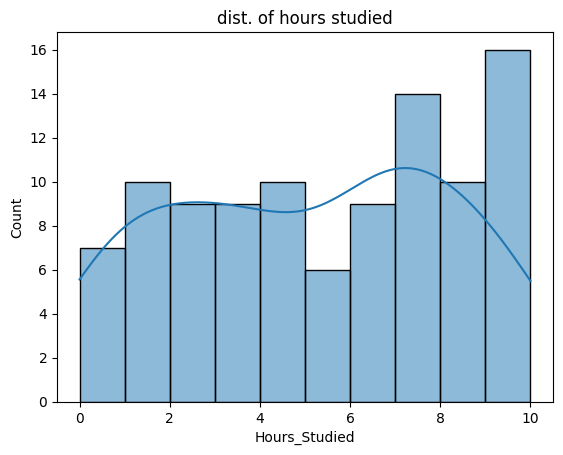

In [62]:
sns.histplot(df['Hours_Studied'],bins =10, kde= True)
plt.title("dist. of hours studied")
plt.show()

Hours of study are almost uniformly distributed as we can see with students more on the higher hours of study.

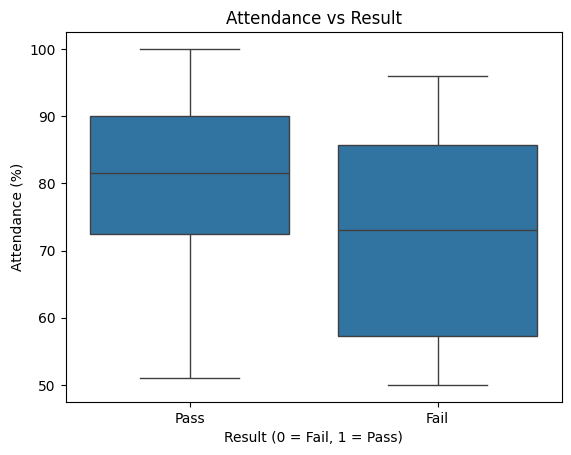

In [63]:

sns.boxplot(x='Result', y='Attendance', data=df)
plt.title("Attendance vs Result")
plt.xlabel("Result (0 = Fail, 1 = Pass)")
plt.ylabel("Attendance (%)")
plt.show()

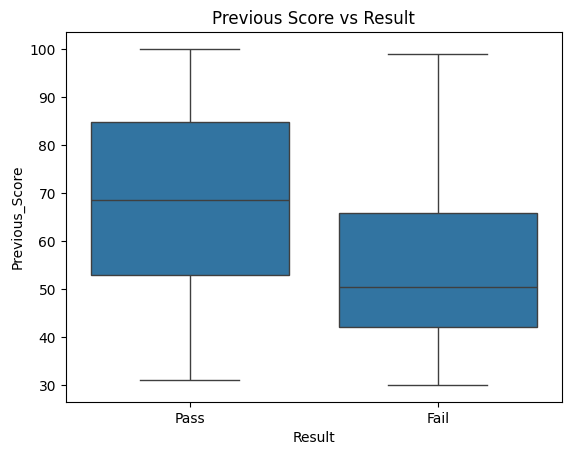

In [64]:
# Boxplot of Previous Scores by Result
sns.boxplot(x='Result',y ='Previous_Score', data =df)
plt.title("Previous Score vs Result")
plt.show()

Students having lesser previous score are more on the failing side on average.

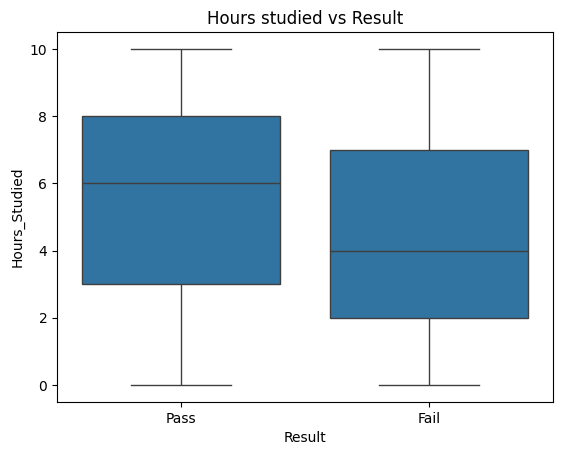

In [65]:
# Boxplot of hours studied by Result
sns.boxplot(x='Result',y ='Hours_Studied', data =df)
plt.title("Hours studied vs Result")
plt.show()

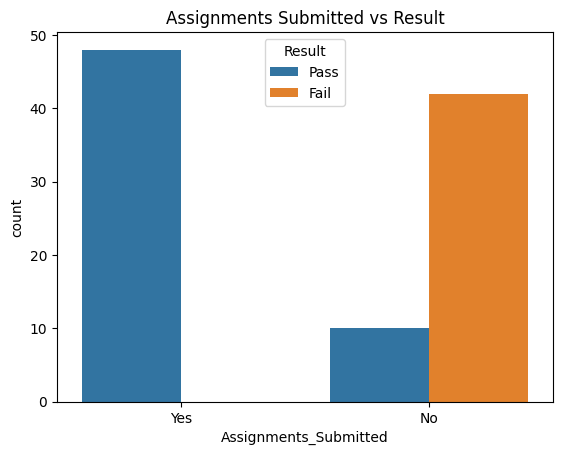

In [66]:
# Countplot for Assignments Submitted
sns.countplot(x='Assignments_Submitted', hue='Result', data=df)
plt.title("Assignments Submitted vs Result")
plt.show()

This shows submitting assignments increses the chance of passing.The students who have submitted the assignments all have passed.

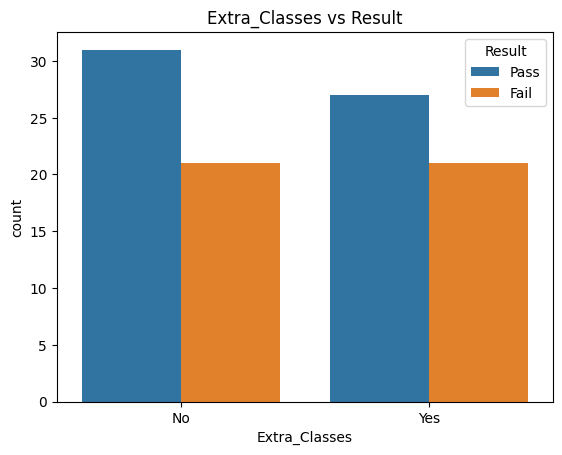

In [67]:
# Countplot for Extra_Classes
sns.countplot(x='Extra_Classes', hue='Result', data=df)
plt.title("Extra_Classes vs Result")
plt.show()

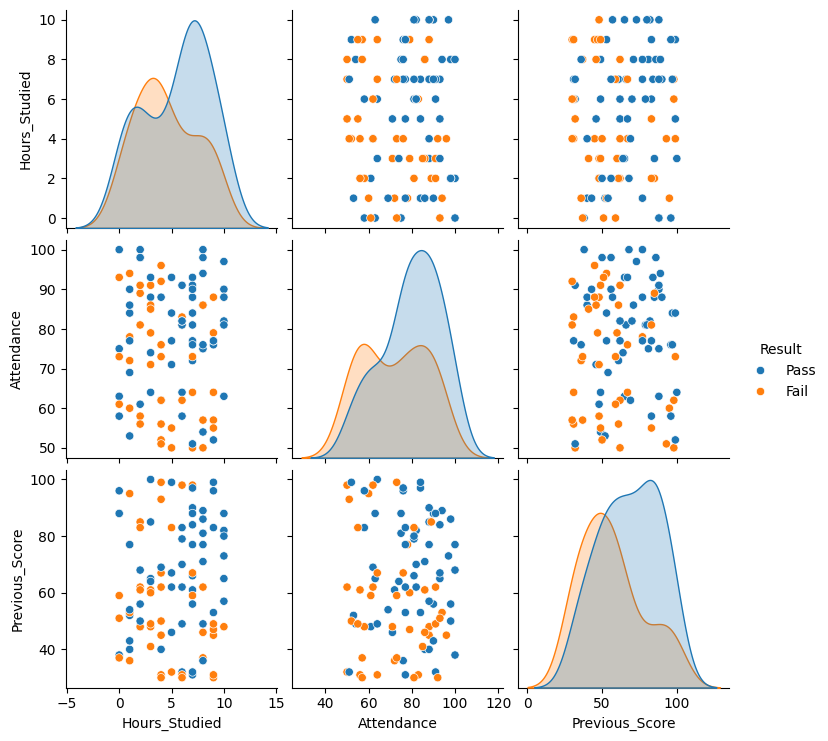

In [68]:
sns.pairplot(df, hue = 'Result')
plt.show()

Why We Plot These in EDA:
1. histplot(df['Hours_Studied'], kde=True)

Why? To understand how the hours studied are distributed.

What we learn: Is it skewed? Are most students studying less than 5 hours? Any outliers?


2. boxplot(x='Result', y='Previous_Score')

Why? To compare score distributions between Pass and Fail groups.

What we learn: Do passed students generally have higher previous scores? Any overlap?

3. countplot(x='Assignments_Submitted', hue='Result')

Why? To check the relationship between assignment submission and result.

What we learn: Does submitting assignments increase the chance of passing?

4. pairplot(df, hue='Result')

Why? To see pairwise relationships between all features and how they separate the Pass/Fail classes.

What we learn: Are there natural clusters or patterns that might help the model later?

5. value_counts() for categorical variables

Why? To check for class imbalance or skewed categories.

What we learn: Is our target variable balanced? Do we have enough examples of each category

In [69]:
#first we have to encode categorical variables.

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

# Apply on binary categorical features
df[['Assignments_Submitted', 'Extra_Classes']] = oe.fit_transform(
    df[['Assignments_Submitted', 'Extra_Classes']]
)

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])

In [71]:
#separating X and y
X = df.drop('Result',axis = 1)
y = df['Result']

In [72]:
X.shape

(100, 5)

In [73]:
y.shape

(100,)

Now we will predict if the student will pass or fail using the given data using decision tree classifier.

In [74]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [75]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state= 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred =model.predict(X_test)

print("Accuracy score:\n",accuracy_score(y_test,y_pred))
print("Classification report\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy score:
 1.0
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[10  0]
 [ 0 10]]


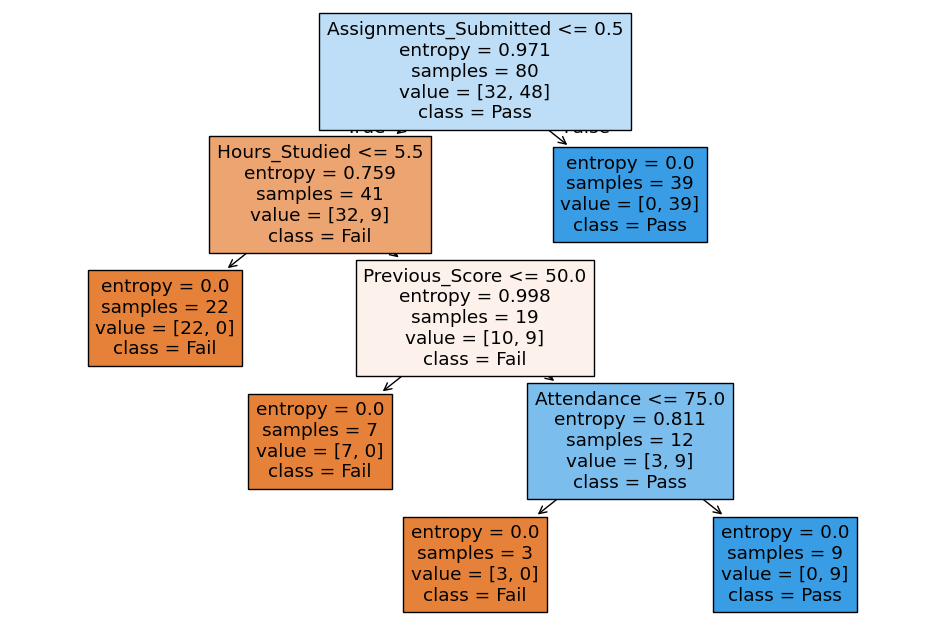

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=["Fail", "Pass"], filled=True)
plt.show()



📊 1. Exploratory Data Analysis (EDA)
Hours Studied:

Students who studied more than 5 hours/day had a significantly higher chance of passing.

Attendance:

Most passing students had attendance > 75%.

Previous Scores:

Strong correlation with result — higher previous scores led to higher pass rates.

Assignments Submitted:

Clear impact — students who submitted assignments were much more likely to pass.

Extra Classes:

Mixed effect; not a major deciding factor in this dataset.

🌲 2. Decision Tree Model Insights
Model Type: DecisionTreeClassifier with criterion='entropy'

Training/Test Split: 80/20

Encoding Used:

OrdinalEncoder for features (Yes/No)

LabelEncoder for target (Pass/Fail)

Accuracy: (Insert your accuracy score here from output)

Most Influential Features:

Hours_Studied

Assignments_Submitted

Previous_Score

🔍 3. Confusion Matrix Interpretation
True Positives (TP): Correctly predicted Passes

True Negatives (TN): Correctly predicted Fails

False Positives (FP): Predicted Pass, actually Fail

False Negatives (FN): Predicted Fail, actually Pass

Low FP/FN = good model performance.

🎯 4. Conclusion
Students who study regularly, maintain good attendance, and submit assignments are very likely to pass — regardless of previous scores.

